In [69]:
import pandas as pd
train = pd.read_csv("/Users/juhn/Desktop/stady_file/資料整理/鐵達尼號/train.csv",encoding="utf-8")
test = pd.read_csv("/Users/juhn/Desktop/stady_file/資料整理/鐵達尼號/test.csv",encoding="utf-8")

In [70]:
train_median = train.median(numeric_only=True)
train = train.fillna(train_median)

test_median = test.median(numeric_only=True)
test = test.fillna(test_median)

In [71]:
med = train["Embarked"].value_counts().idxmax()
train["Embarked"] = train["Embarked"].fillna(med)
train = train.drop("Cabin",axis=1)
test = test.drop("Cabin",axis=1)

In [72]:
train_encoder = pd.get_dummies(train["Embarked"]).astype("int64")
train = pd.concat([train,train_encoder],axis=1)

test_encoder = pd.get_dummies(test["Embarked"]).astype("int64")
test = pd.concat([test,test_encoder],axis=1)

train_sex_encoder = pd.get_dummies(train["Sex"]).astype("int64")
train = pd.concat([train,train_sex_encoder],axis=1)

test_sex_encoder = pd.get_dummies(test["Sex"]).astype("int64")
test = pd.concat([test,test_sex_encoder],axis=1)


In [73]:
test = test.drop(["Embarked","Sex","Ticket"],axis=1)
train = train.drop(["Embarked","PassengerId","Sex","Ticket"],axis=1)

In [74]:
train = train[:]
test = test[:]

In [75]:
train

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,0,0,1,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,0,0,1,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,0,0,1,1,0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,1,0,0,0,1


In [76]:
s = "Johnston, Miss. Catherine Helen ".split(",")[-1].split(".")[0]
s = s.replace(" ","")
print(s)

Miss


In [77]:
def nameflow(s):
    mid = s.split(",")[-1].split(".")[0]
    mid = mid.replace(" ","")

    return mid
name = train["Name"].apply(nameflow)
name


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [78]:
print(name.value_counts())

Name
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: count, dtype: int64


In [79]:
pd.crosstab(name,train["Survived"]).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [80]:
def clean_name(s):
    d = {
        "Master":"Master",
        "Miss":"Miss",
        "Mr":"Mr",
        "Mrs":"Mrs"
    }
    return d.get(s)
name.apply(clean_name).isna().sum()


np.int64(27)

In [ ]:
name = name.apply(nameflow).apply(clean_name)
name = pd.get_dummies(name).astype("int64")
train = pd.concat([train,name],axis=1)

np.int64(27)

In [82]:
train = train.drop("Name",axis=1)

In [83]:
name = test["Name"].apply(nameflow).apply(clean_name)
name = pd.get_dummies(name).astype("int64")
test = pd.concat([test,name],axis=1)
test = test.drop("Name",axis=1)

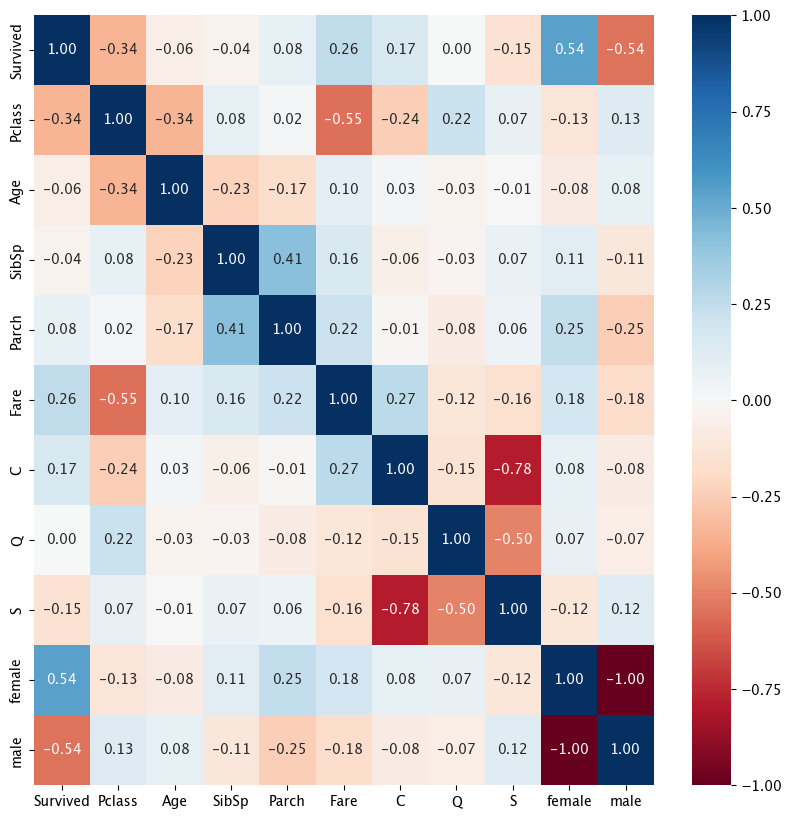

In [84]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
sns.heatmap(data=train.corr(),cmap="RdBu",annot=True,fmt=".2f")
plt.show()

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np

trainx = train.drop(["Survived"],axis=1)
trainy = train["Survived"]

clf = RandomForestClassifier(max_depth=8,n_estimators=50)

np.average(cross_val_predict(clf,trainx,trainy,cv=10))

np.float64(0.32098765432098764)

In [86]:
from sklearn.model_selection import GridSearchCV
p = {
    "max_depth":list(range(5,11)),
    "n_estimators":list(range(20,32))
}
clf = RandomForestClassifier()
s = GridSearchCV(clf,p,cv=5)
s.fit(trainx,trainy)
print(s.best_score_)
print(s.best_params_)

0.8327788588286987
{'max_depth': 10, 'n_estimators': 29}


In [87]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,0,1,0
416,1308,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


In [88]:
testx = test.drop("PassengerId",axis=1)
PassengerId = test["PassengerId"]

clf = RandomForestClassifier(max_depth=20,n_estimators=24)
clf.fit(trainx,trainy)
pre = clf.predict(testx)

ans = pd.DataFrame()
ans["PassengerID"] = PassengerId
ans["Survived"] = pre

ans

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Master
- Miss
- Mr
- Mrs


In [ ]:
clf.feature_importances_

array([0.07155344, 0.22892979, 0.05751491, 0.03641981, 0.26219043,
       0.0131612 , 0.00983917, 0.01096923, 0.05846073, 0.10114582,
       0.01405495, 0.03396089, 0.08513991, 0.01665973])

In [ ]:
trainx.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female',
       'male', 'Master', 'Miss', 'Mr', 'Mrs'],
      dtype='object')